In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.utils import plot_model

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
# preparing the training dataset
x_train = train_data[['x1', 'x2']].values
y_train = train_data['y'].values

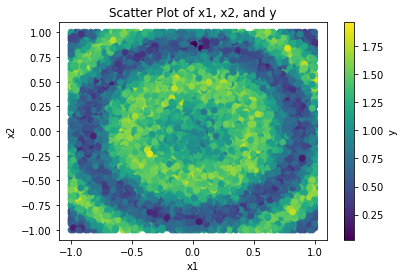

In [4]:
import matplotlib.pyplot as plt

# Extract x1, x2 values
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]

# Create the scatter plot
plt.scatter(x1_train, x2_train, c=y_train, cmap='viridis')  # Color points based on y values
plt.xlabel('x1')  # Set x-axis label
plt.ylabel('x2')  # Set y-axis label
plt.title('Scatter Plot of x1, x2, and y')  # Set plot title
plt.colorbar(label='y')  # Add colorbar indicating y values
plt.show()

In [5]:
# normalizing the dataset
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
y_train = (y_train - np.mean(y_train, axis=0)) / np.std(y_train, axis=0)

In [ ]:
# import tensorflow as tf

# # Define the autoencoder architecture
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),  # Encoder
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),  # Decoder
#     tf.keras.layers.Dense(2)  # Output layer
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the autoencoder on the noisy training data
# model.fit(x_train, x_train, epochs=100, batch_size=32)

# # Obtain the denoised output
# x_train = model.predict(x_train)

In [6]:
# spliting the data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [27]:
# Define the neural network architecture with pooling
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),  
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='linear')
])

In [31]:
# compiling the data
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [29]:
# Define the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor for early stopping
    patience=10,           # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the weights of the best model
)

# defining checkpoint for changing the parameters 
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-best.h5', 
                             verbose=1, monitor='val_loss',
                             save_best_only=True, mode='auto')  

In [ ]:
# training the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), 
          epochs=1000, batch_size=32, callbacks=[checkpoint], verbose=False)

In [34]:
# Normalize the true y values in the test data
y_true = y_train
y_true = (y_true - np.mean(y_train)) / np.std(y_train)

# Calculate the predicted y values from the model
model = tf.keras.models.load_model('model-best.h5')
y_test_pred = model.predict(x_train)
y_pred = y_test_pred.flatten()

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

200/200 [==============================] - 1s 3ms/step
Mean Squared Error (MSE): 0.1841835994389264
Mean Absolute Error (MAE): 0.32896307293843974


In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               768       
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                      

In [35]:
print(y_true[0])
print("\n")
print(y_pred[0])

-1.301193749274905


-1.1044471


In [36]:
# Normalize the input features in the test data:
x_test = test_data[['x1', 'x2']].values
x_test = (x_test - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)

In [37]:
# Use the trained model to estimate the output on the test data:
y_test_pred = model.predict(x_test)

63/63 [==============================] - 0s 3ms/step


In [38]:
print(y_test_pred)

[[1.2443991 ]
 [0.5184256 ]
 [1.138288  ]
 ...
 [0.7266156 ]
 [1.2443314 ]
 [0.23798107]]


In [39]:
# Create a DataFrame for the output
output_data = pd.DataFrame({'ID': range(1, len(y_test_pred)+1), 'y': y_test_pred.flatten()})

# Save the DataFrame to a CSV file
output_data.to_csv('submissions.csv', index=False)